## Solving TSP for benchmarking
 4 cities 

In [1]:
# Lazy importing 
import sys 
sys.path.append('..')

In [4]:
from utils import TSP 
from amplify import solve

tsp = TSP(4)

model = tsp.qubo(format="amplify")['model']

((0, 1, 2, 3), 17)

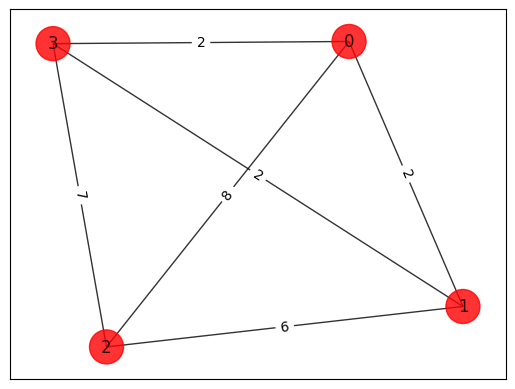

In [23]:
from utils import draw_graph, draw_tour, brute_force_tsp

draw_graph(tsp.distance_matrix)
brute_force_tsp(tsp.distance_matrix)

In [12]:
# Initialise Fixstars Client
from Utils.solvers import GetFixstarClient

clientFS = GetFixstarClient()

# Solve set partitioning and view result
result = solve(model, clientFS)

print(result.best.objective)
print(result.best.values)

17.0
{q_{0,0}: 0, q_{0,1}: 1, q_{0,2}: 0, q_{0,3}: 0, q_{1,0}: 1, q_{1,1}: 0, q_{1,2}: 0, q_{1,3}: 0, q_{2,0}: 0, q_{2,1}: 0, q_{2,2}: 0, q_{2,3}: 1, q_{3,0}: 0, q_{3,1}: 0, q_{3,2}: 1, q_{3,3}: 0}


In [28]:
from utils import reorder

tour = reorder(list(result.best.values.values()), len(tsp.distance_matrix))
tour

array([1., 0., 3., 2.])

In [11]:
from Utils.solvers import GetGurobiClient



clientG = GetGurobiClient(r"D:\miniconda3\envs\cwq\gurobi110.dll")
resultG = solve(model, clientG)

print(resultG.best.objective)
print(resultG.best.values)

RuntimeError: PIP license can only be used from gurobipy interface